***Vorlesung 'Syntax natürlicher Sprachen', WS 2020/21***

---
# Übung 7

In [1]:
from exercises_7 import *
from questions import aufgabe
import nltk
from IPython.display import display

---
## Aufgabe 1 : CFG: Kongruenz in Nominalphrasen

#### Die folgende Grammatik entspricht der Grammatik von Übungsblatt 4 am Ende der Präsenzaufgaben. (Sie können also stattdessen auch Ihre im Zuge der Übung von damals selbst erstellte Grammatik als Grundlage verwenden.)

#### Orientieren Sie sich an folgender Tabelle zur Mehrdeutigkeit der Formen des bestimmen Artikels im Deutschen und passen Sie die Grammatik so an, dass sie nur noch grammatikalisch korrekte Nominalphrasen als Teil von Sätzen akzeptiert. Konzentrieren Sie sich auf die Kongruenz von Artikel und Nomen im Genus.

|Form|mögliche Merkmale|
|----|-----------------|
|der|[NUM=sg, GEN=mas, KAS=nom]|
|&nbsp;|[NUM=sg, GEN=fem, KAS=dat]|
|&nbsp;|[NUM=sg, GEN=fem, KAS=GEN]|
|&nbsp;|[NUM=pl, KAS=GEN]|
|die|[NUM=sg, GEN=fem, KAS=nom]|
|&nbsp;|[NUM=sg, GEN=fem, KAS=akk]|
|&nbsp;|[NUM=pl, KAS=nom]|
|&nbsp;|[NUM=pl, KAS=akk]|
|das|[NUM=sg, GEN=neu, KAS=nom]|
|&nbsp;|[NUM=sg, GEN=neu, KAS=akk]|

In [2]:
grammar = """
S -> NP VP

NP[GEN=?x] -> DET[GEN=?x] NOM[GEN=?x]
NOM[GEN=?y] -> ADJ NOM[GEN=?y] | N[GEN=?y]
VP -> V NP NP | V NP | V

ADJ -> "schöne" | "kluge" | "dicke"

DET[GEN=mas] -> "der"
DET[GEN=fem] -> "die"
DET[GEN=neu] -> "das"

N[GEN=mas] -> "Mann"
N[GEN=fem] -> "Frau"
N[GEN=neu] -> "Buch"

V -> "gibt" | "schenkt" | "schläft" | "gefällt" | "kennt"
"""

In [3]:
def test_grammar(grammar, sentences):
    cfg = nltk.grammar.FeatureGrammar.fromstring(grammar)
    parser = nltk.parse.FeatureEarleyChartParser(cfg)
    
    for i, sent in enumerate(sentences, 1):
        print("Satz {}: {}".format(i, sent))
        results = parser.parse(sent.split())
        analyzed = False
        for tree in results:
            display(tree)
            # tree.pretty_print()
            # print(tree)
            analyzed = True
        if not analyzed:
            print("\x1b[31mKeine Analyse möglich\x1b[0m")

In [4]:
pos_sentences = ["der Mann schläft", "der schöne Mann schläft",
                 "der Frau gefällt das Buch",
                 "der Mann schenkt der Frau das Buch"]
neg_sentences = ["das Mann schläft", "die Mann schläft",
                 "das Mann schenkt die kluge Frau",
                "das Frau schläft", "der Buch schläft", "der Frau schläft",
                "die Buch kennt das schöne Frau", "das Buch schläft das Buch",
                "der Mann kennt der Mann"]

Satz 1: das Mann schläft
Keine Analyse möglich
Satz 2: die Mann schläft
Keine Analyse möglich
Satz 3: das Mann schenkt die kluge Frau
Keine Analyse möglich
Satz 4: das Frau schläft
Keine Analyse möglich
Satz 5: der Buch schläft
Keine Analyse möglich
Satz 6: der Frau schläft
Keine Analyse möglich
Satz 7: die Buch kennt das schöne Frau
Keine Analyse möglich
Satz 8: das Buch schläft das Buch


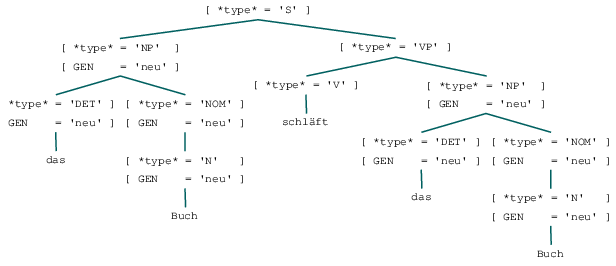

Satz 9: der Mann kennt der Mann


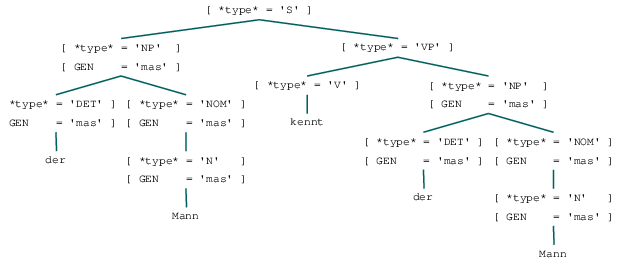

In [5]:
test_grammar(grammar, neg_sentences)

---
## Aufgabe 2: CFG: Kasus

#### Als nächstes sollen Kasusbedingungen in die Grammatik integriert werden:

1. Es gibt nur eine Nominalphrase im Nominativ (Subjekt).
1. Je nach Valenzstellen des Verbes sollen nur Nominalphrasen in den korrekten Kasus akzeptiert werden.
1. *Optional:* Versuchen Sie die freie Satzstellung des Deutschen zu berücksichtigen.

In [6]:
grammar = """

S -> NP[KAS=nom] VP

NP[GEN=?x,KAS=?y] -> DET[GEN=?x,KAS=?y] NOM[GEN=?x]
NOM[GEN=?y] -> ADJ NOM[GEN=?y] | N[GEN=?y]

VP[SUBCAT=ditrans] -> V[SUBCAT=ditrans] NP[KAS=dat] NP[KAS=akk] \
                    | V[SUBCAT=ditrans] NP[KAS=akk] NP[KAS=dat]
VP[SUBCAT=trans] -> V[SUBCAT=trans,OBJCASE=?x] NP[KAS=?x]
VP[SUBCAT=intrans] -> V[SUBCAT=intrans]

ADJ -> "schöne" | "kluge" | "dicke"

DET[GEN=mas,KAS=nom] -> "der"
DET[GEN=fem,KAS=gen] -> "der"
DET[GEN=fem,KAS=dat] -> "der"
DET[GEN=fem,KAS=nom] -> "die"
DET[GEN=fem,KAS=akk] -> "die"
DET[GEN=neu,KAS=nom] -> "das"
DET[GEN=neu,KAS=akk] -> "das"

N[GEN=mas] -> "Mann"
N[GEN=fem] -> "Frau"
N[GEN=neu] -> "Buch"

V[SUBCAT=ditrans] -> "gibt" | "schenkt"
V[SUBCAT=intrans] -> "schläft"
V[SUBCAT=trans,OBJCASE=dat] -> "gefällt"
V[SUBCAT=trans,OBJCASE=akk] -> "kennt"

"""

In [7]:
pos_sentences.extend([
    "das Buch gefällt der Frau",
    "das Buch kennt die Frau",
    "der Mann gibt der Frau das Buch"
])

neg_sentences.extend([
    "der Mann schläft das Buch",
    "die Frau gefällt das Buch",
    "das Buch kennt",
    "die Frau gibt das Buch",
    "der Mann gibt der Mann der Mann"
])

In [8]:
test_grammar(grammar, neg_sentences)

Satz 1: das Mann schläft
Keine Analyse möglich
Satz 2: die Mann schläft
Keine Analyse möglich
Satz 3: das Mann schenkt die kluge Frau
Keine Analyse möglich
Satz 4: das Frau schläft
Keine Analyse möglich
Satz 5: der Buch schläft
Keine Analyse möglich
Satz 6: der Frau schläft
Keine Analyse möglich
Satz 7: die Buch kennt das schöne Frau
Keine Analyse möglich
Satz 8: das Buch schläft das Buch
Keine Analyse möglich
Satz 9: der Mann kennt der Mann
Keine Analyse möglich
Satz 10: der Mann schläft das Buch
Keine Analyse möglich
Satz 11: die Frau gefällt das Buch
Keine Analyse möglich
Satz 12: das Buch kennt
Keine Analyse möglich
Satz 13: die Frau gibt das Buch
Keine Analyse möglich
Satz 14: der Mann gibt der Mann der Mann
Keine Analyse möglich


--- 
# Hausaufgaben

---
## Aufgabe 3: Plural für das Subjekt

#### Ergänzen Sie die in den Präsenzaufgaben erstellte Grammatik um die Möglichkeit, das Subjekt in den Plural zu setzen.

#### Dafür müssen Sie folgendes tun:
  1. Erstellen Sie lexikalische Regeln für Pluralformen der Verben, Adjektive und Substantive (Nominativ ist ausreichend.).
  1. Vervollständigen Sie die lexikalischen Regeln für die Form des Artikels *die* um die korrekte Merkmalstruktur für den Plural.
  1. Formulieren Sie eine Kongruenzbedingung in Numerus zwischen Verb und Subjekt.

In [9]:
grammar = """

BITTE NACH BEARBEITUNG VON (2) VON OBEN KOPIEREN

"""

In [10]:
pos_sentences.extend([
    "die Männer geben der Frau das Buch",
    "die Bücher gefallen der Frau",
    "die Frauen schlafen"
])

neg_sentences.extend([
    "der Mann geben der Frau das Buch",
    "das Buch gefällt der Frauen",
    "die Frauen schläft"
])

---
## Aufgabe 4: Adverben und Verbzweitstellung

#### Fügen Sie der Grammatik jetzt die zwei Adverben *heute* und *morgen* hinzu. Adverben können prinzipiell sehr frei im Satz platziert werden. Eine Besonderheit des Deutschen ist aber die sog. Verbzweitstellung, wie sie z. B. in Sätzen wie *Heute schläft der Mann.* deutlich wird.
#### Versuchen Sie alle Möglichkeiten zu implementieren:

In [11]:
grammar = """

BITTE NACH BEARBEITUNG VON (3) VON OBEN KOPIEREN

"""

In [12]:
pos_sentences.extend([
  "heute gibt der Mann der Frau das Buch",
  "der Mann gibt heute der Frau das Buch",
  "der Mann gibt der Frau heute das Buch",
  "der Mann gibt der Frau das Buch heute"
])

neg_sentences.extend([
    "heute der Mann gibt der Frau das Buch"
])

---
## Aufgabe 5: Fragen zu NLTK-Kapitel 9.3.5

#### Lesen Sie das NLTK-Teilkapitel 9.3.5 (’Case and Gender in German’): http://www.nltk.org/book/ch09.html#tab-german-def-art.
#### Vollziehen Sie im letzten Codeblock das Trace-Output nach und erklären Sie, warum der Satz von der Grammatik abgelehnt wird.

In [13]:
aufgabe(blatt7_5)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche DET-Kategorien gibt es für den Satz?</…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wieso wird der Satz von der Grammatik abgelehnt…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wo liegt das Problem, sodass der Satz abgeleh…